# Objetivo

Treinar, testar e validar um modelo de clusterização.

# Bibliotecas

In [1]:
import pandas as pd
from sklearn import cluster
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Lendo as tabelas

In [2]:
catalogo = "../data/processed/"

# Tabela de features
df_raw= pd.read_csv(f"{catalogo}tb_book_sellers.csv")

In [3]:
df_raw.info()
print(df_raw.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24547 entries, 0 to 24546
Columns: 214 entries, seller_id to recbruta_utilidades_domesticas_prop
dtypes: float64(141), int64(71), object(2)
memory usage: 40.1+ MB
(24547, 214)


In [4]:
df_raw.head()

,seller_id,data,qtd_agro_industria_e_comercio,qtd_alimentos,qtd_alimentos_bebidas,qtd_artes_e_artesanato,qtd_artigos_de_festas,qtd_artigos_de_natal,qtd_audio,qtd_automotivo,...,recbruta_pet_shop_prop,recbruta_portateis_casa_forno_e_cafe_prop,recbruta_portateis_cozinha_e_preparadores_de_alimentos_prop,recbruta_relogios_presentes_prop,recbruta_seguros_e_servicos_prop,recbruta_sinalizacao_e_seguranca_prop,recbruta_tablets_impressao_imagem_prop,recbruta_telefonia_prop,recbruta_telefonia_fixa_prop,recbruta_utilidades_domesticas_prop
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-11-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0015a82c2db000af6aaaf3ae2ecb0532,2017-12-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0015a82c2db000af6aaaf3ae2ecb0532,2018-01-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001cca7ae9ae17fb1caed9dfb1094831,2017-03-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Treino

In [5]:
df_train = df_raw[df_raw['data'] == '2018-05-01']
print(f'Shape antes: {df_train.shape}')

features = [c for c in df_train.columns if c.startswith('recbruta_') and c.endswith('_prop')]

cols = ['data', 'seller_id'] + features

df_train = df_train[cols]

print(f'Shape depois: {df_train.shape}')

Shape antes: (1441, 214)
Shape depois: (1441, 72)


In [6]:
df_train.head()

,data,seller_id,recbruta_agro_industria_e_comercio_prop,recbruta_alimentos_prop,recbruta_alimentos_bebidas_prop,recbruta_artes_e_artesanato_prop,recbruta_artigos_de_festas_prop,recbruta_artigos_de_natal_prop,recbruta_audio_prop,recbruta_automotivo_prop,...,recbruta_pet_shop_prop,recbruta_portateis_casa_forno_e_cafe_prop,recbruta_portateis_cozinha_e_preparadores_de_alimentos_prop,recbruta_relogios_presentes_prop,recbruta_seguros_e_servicos_prop,recbruta_sinalizacao_e_seguranca_prop,recbruta_tablets_impressao_imagem_prop,recbruta_telefonia_prop,recbruta_telefonia_fixa_prop,recbruta_utilidades_domesticas_prop
18,2018-05-01,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,2018-05-01,002100f778ceb8431b7a1020ff7ab48f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,2018-05-01,004c9cd9d87a3c30c522c48c4fc07416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,2018-05-01,00720abe85ba0859807595bbf045a33b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65,2018-05-01,00d8b143d12632bad99c0ad66ad52825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Kmeans

In [7]:
# Treino do modelo usando Agglomerative Clustering
model = cluster.KMeans(n_clusters=10)
model.fit(df_train[features]) # fit: ajuste do modelo a partir das features

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [8]:
df = df_train[features].copy()
df['cluster_id'] = model.labels_
df_train['cluster_id'] = model.labels_

df_train[['seller_id', 'cluster_id']]

,seller_id,cluster_id
18,001cca7ae9ae17fb1caed9dfb1094831,2
31,002100f778ceb8431b7a1020ff7ab48f,5
49,004c9cd9d87a3c30c522c48c4fc07416,6
55,00720abe85ba0859807595bbf045a33b,5
65,00d8b143d12632bad99c0ad66ad52825,2
...,...,...
24479,ffad1e7127fb622cb64a900751590acd,5
24487,ffc470761de7d0232558ba5e786e57b7,2
24507,ffdd9f82b9a447f6f8d4b91554cc7dd3,5
24521,ffeee66ac5d5a62fe688b9d26f83f534,2


In [9]:
df_train['cluster_id'].value_counts()

cluster_id
2    605
5    194
3    143
4    139
9     85
7     84
6     75
1     48
0     41
8     27
Name: count, dtype: int64

In [10]:
# Trasnforma as features de proporção em lista

df_cluster_mean = (
    df
    .groupby('cluster_id')
    .agg({col: 'mean' for col in features})
)

df_cluster_mean

,recbruta_agro_industria_e_comercio_prop,recbruta_alimentos_prop,recbruta_alimentos_bebidas_prop,recbruta_artes_e_artesanato_prop,recbruta_artigos_de_festas_prop,recbruta_artigos_de_natal_prop,recbruta_audio_prop,recbruta_automotivo_prop,recbruta_bebes_prop,recbruta_bebidas_prop,...,recbruta_pet_shop_prop,recbruta_portateis_casa_forno_e_cafe_prop,recbruta_portateis_cozinha_e_preparadores_de_alimentos_prop,recbruta_relogios_presentes_prop,recbruta_seguros_e_servicos_prop,recbruta_sinalizacao_e_seguranca_prop,recbruta_tablets_impressao_imagem_prop,recbruta_telefonia_prop,recbruta_telefonia_fixa_prop,recbruta_utilidades_domesticas_prop
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000940,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.005618,0.000000,0.000636
1,0.000000,0.000000,0.001846,0.000105,0.000000,0.000000,0.000000,0.002979,0.874664,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.004926,0.006699,0.012105,0.003742,0.003455,0.007758,0.003639,0.009091,0.012109,0.013142,...,0.062336,0.002398,0.0,0.049629,0.0,0.011656,0.000939,0.049631,0.006989,0.014388
3,0.000000,0.000477,0.001365,0.000988,0.000000,0.000000,0.000747,0.007339,0.003592,0.001828,...,0.003193,0.000406,0.0,0.001786,0.0,0.000506,0.000000,0.001417,0.001547,0.006705
4,0.000000,0.001249,0.000000,0.000000,0.000000,0.000000,0.000000,0.002713,0.005121,0.000000,...,0.003047,0.000000,0.0,0.002461,0.0,0.000000,0.000000,0.000014,0.000000,0.002068
5,0.000761,0.000007,0.001208,0.001899,0.000000,0.000000,0.000023,0.002472,0.005443,0.000640,...,0.000881,0.000000,0.0,0.002342,0.0,0.003181,0.000000,0.000051,0.000000,0.508888
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000506,0.005749,0.000000,...,0.000038,0.000000,0.0,0.000222,0.0,0.000000,0.000000,0.000000,0.000000,0.005028
7,0.000725,0.000000,0.000000,0.000515,0.000000,0.000000,0.000485,0.002225,0.000147,0.000000,...,0.000198,0.000000,0.0,0.000182,0.0,0.000143,0.000270,0.010685,0.003009,0.000899
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011325,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


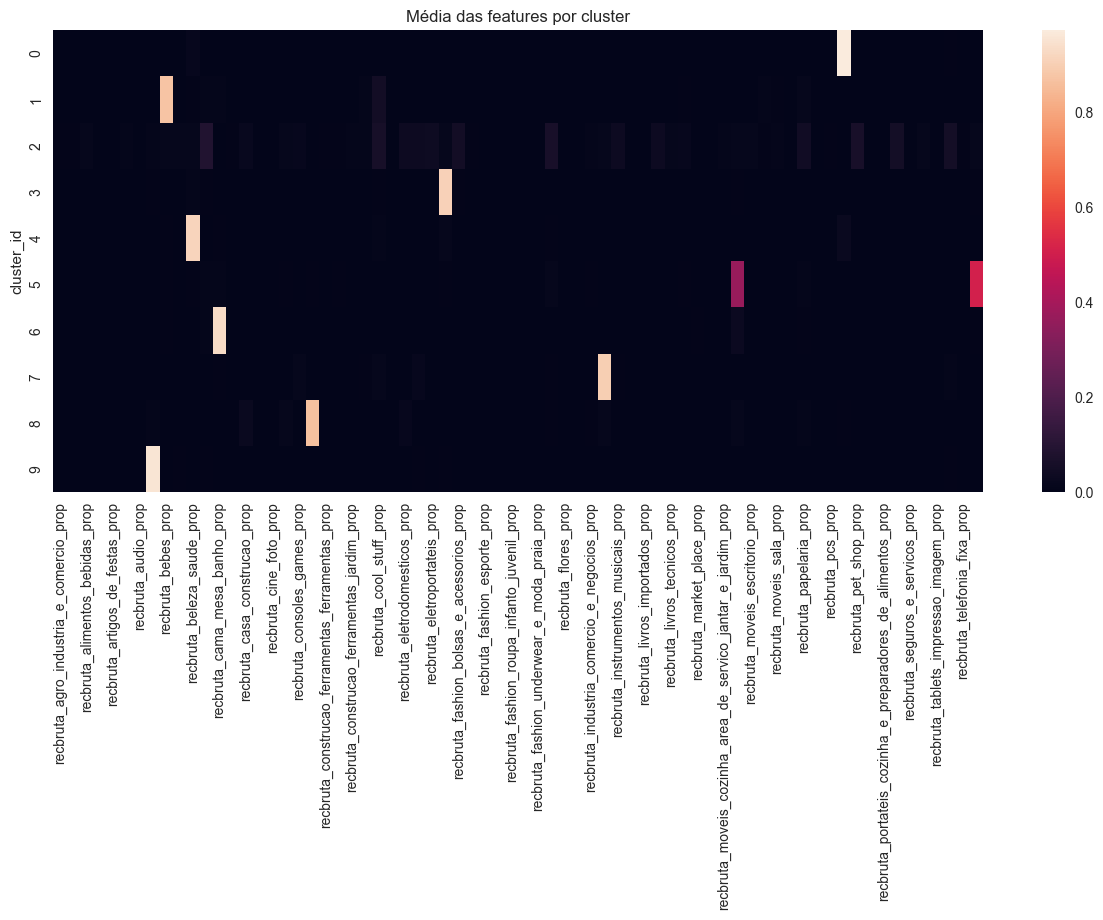

In [11]:
# Gráfico para mostrar as categorias com maior proporção média (força) dentro de cada cluster
plt.figure(figsize=(15,6))
sns.heatmap(df_cluster_mean)
plt.title('Média das features por cluster')
plt.show()

## Árvore de Devisão

In [12]:
print(f"X: {type(df_train[features])}")
print(f"y: {type(df_train['cluster_id'])}")
print(f"Qtd Colunas: {len(df_train[features].columns)}")

X: <class 'pandas.core.frame.DataFrame'>
y: <class 'pandas.core.series.Series'>
Qtd Colunas: 70


In [13]:
# Como não temos clareza de quais categorias são mais importantes dentro de cada cluster, optamos por aplicar uma árvore de decisão
# Isso vai possibilitar entendermos quais features são mais importantes dentro de cada cluster

# Usando árvore de decisão para entender quais features são mais importantes na clusterização
X = df_train[features]
y = df_train['cluster_id']

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09958977, 0.07252584, 0.        ,
       0.14748416, 0.        , 0.0976197 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04728891,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14522265,
       0.        , 0.        , 0.        , 0.00177709, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.10297773, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00165398, 0.        , 0.        ,
       0.        , 0.10541681, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06588844,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.11255492])

In [15]:
feature_importance = pd.Series(clf.feature_importances_, index=features) # Pega a importancia das variáveis e ordena
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

recbruta_beleza_saude_prop                      0.147484
recbruta_esporte_lazer_prop                     0.145223
recbruta_utilidades_domesticas_prop             0.112555
recbruta_moveis_decoracao_prop                  0.105417
recbruta_informatica_acessorios_prop            0.102978
                                                  ...   
recbruta_fashion_esporte_prop                   0.000000
recbruta_fashion_roupa_infanto_juvenil_prop     0.000000
recbruta_alimentos_prop                         0.000000
recbruta_fashion_underwear_e_moda_praia_prop    0.000000
recbruta_fashion_roupa_masculina_prop           0.000000
Length: 70, dtype: float64

In [16]:
# seleciona as 10 features mais importantes
top_features = feature_importance.index[:10].tolist()

df_cluster_mean = (
    df_train
    .groupby('cluster_id')
    .agg({col: 'mean' for col in top_features})
)

df_cluster_mean

,recbruta_beleza_saude_prop,recbruta_esporte_lazer_prop,recbruta_utilidades_domesticas_prop,recbruta_moveis_decoracao_prop,recbruta_informatica_acessorios_prop,recbruta_automotivo_prop,recbruta_cama_mesa_banho_prop,recbruta_bebes_prop,recbruta_perfumaria_prop,recbruta_construcao_ferramentas_construcao_prop
cluster_id,,,,,,,,,,
0,0.018795,0.000000,0.000636,0.000000,0.000000,0.000000,0.000000,0.000000,0.974011,0.000000
1,0.005275,0.000000,0.000000,0.000000,0.000000,0.002979,0.008482,0.874664,0.000000,0.000000
2,0.012806,0.014940,0.014388,0.013648,0.012822,0.009091,0.002426,0.012109,0.003569,0.002125
3,0.010538,0.907844,0.006705,0.004397,0.001440,0.007339,0.001625,0.003592,0.000580,0.000013
4,0.913446,0.013671,0.002068,0.001041,0.000000,0.002713,0.005953,0.005121,0.026331,0.001392
5,0.003924,0.005208,0.508888,0.369757,0.001755,0.002472,0.008371,0.005443,0.003699,0.005292
6,0.000789,0.002321,0.005028,0.028677,0.000000,0.000506,0.932263,0.005749,0.000978,0.000000
7,0.003280,0.002834,0.000899,0.003046,0.898611,0.002225,0.004271,0.000147,0.001012,0.001715
8,0.003386,0.003274,0.000000,0.012996,0.014043,0.011325,0.000000,0.000000,0.007086,0.866130


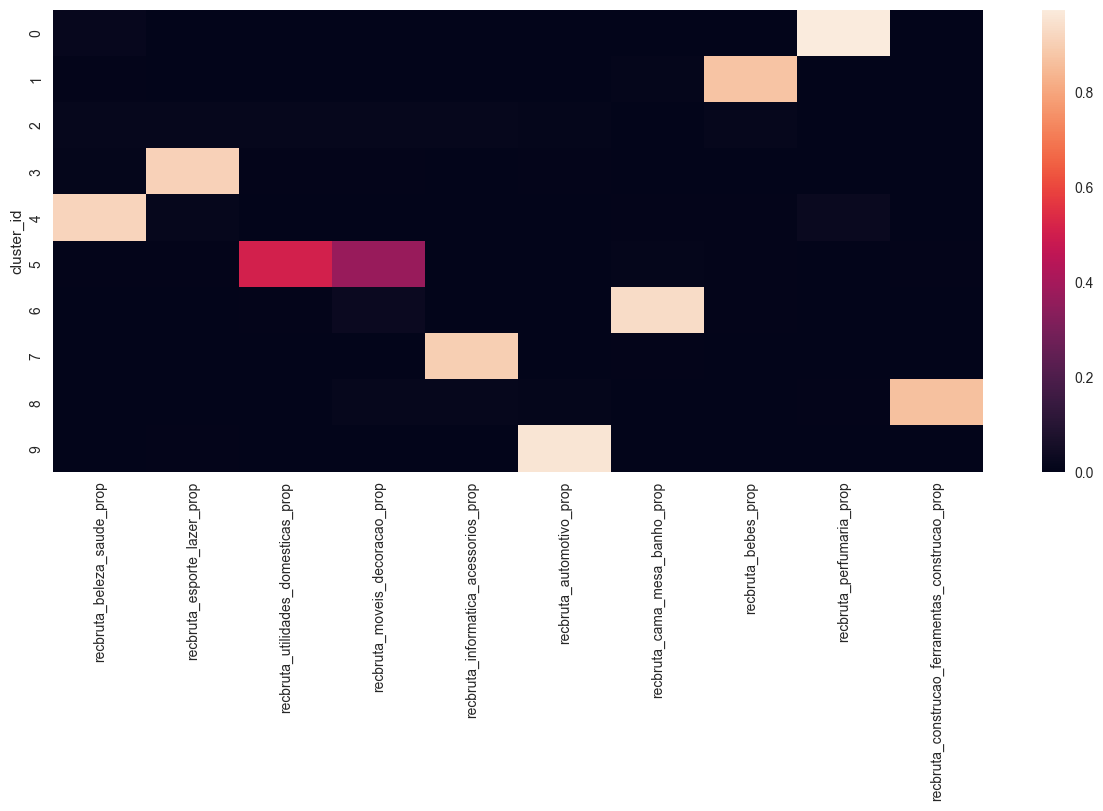

In [17]:
plt.figure(figsize=(15,6))
sns.heatmap(df_cluster_mean)
plt.show()

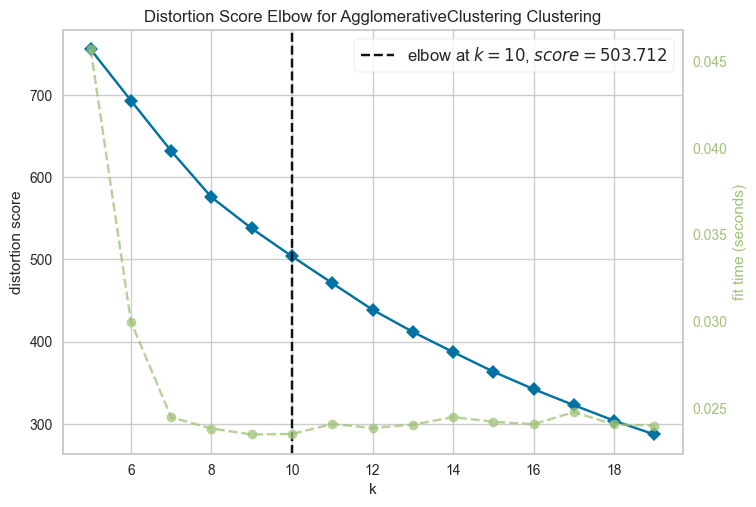

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(5,20))
visualizer.fit(df_train[features])
visualizer.show()

# Conclusões

* Como temos muitas categorias nesta clusterização, o que dificulta o entendimento de quais categorias são mais representativas em cada cluster, ou seja, é difícil identificar qual a categoria predominante dentro de cada grupo. Por isso, optamos por rodar uma árvore de decisão para identificar quais features possuem maior importância dentro do dataset de treino.